<p> This module focuses on the standard PyTorch workflow

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

https://www.learnpytorch.io/01_pytorch_workflow/#3-train-model
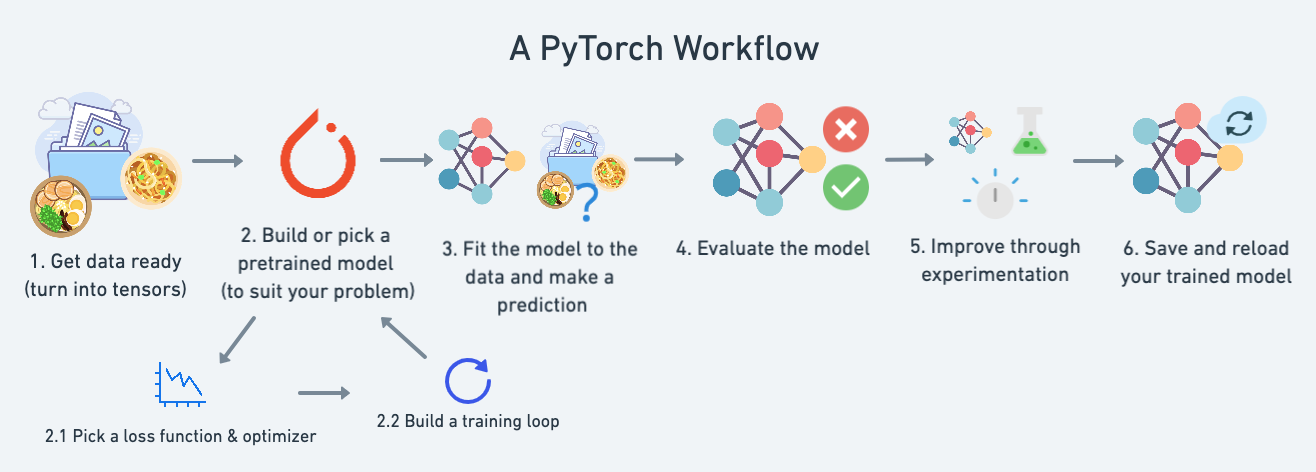

In [34]:
# Make sure we're using a NVIDIA GPU
if torch.cuda.is_available():
  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find("failed") >= 0:
    print("Not connected to a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.")

  # Get GPU name
  gpu_name = !nvidia-smi --query-gpu=gpu_name --format=csv
  gpu_name = gpu_name[1]
  GPU_NAME = gpu_name.replace(" ", "_") # remove underscores for easier saving
  print(f'GPU name: {GPU_NAME}')

  # Get GPU capability score
  GPU_SCORE = torch.cuda.get_device_capability()
  print(f"GPU capability score: {GPU_SCORE}")
  if GPU_SCORE >= (8, 0):
    print(f"GPU score higher than or equal to (8, 0), PyTorch 2.x speedup features available.")
  else:
    print(f"GPU score lower than (8, 0), PyTorch 2.x speedup features will be limited (PyTorch 2.x speedups happen most on newer GPUs).")
  
  # Print GPU info
  print(f"GPU information:\n{gpu_info}")

else:
  print("PyTorch couldn't find a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.")

PyTorch couldn't find a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.


In [2]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

### Step-1: - Creating the Data, and preparing dataset

In [3]:
## Creating a simple dataset for Linear Regression with known parameters 

In [ ]:
# Create *known* parameters
### Here we have created a simple dataset with a linear relationship between X and y.
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

#### Spliting data into training and testing

In [ ]:
## Here we have manually splitted the data into training and test sets. This method needs to introduce shuffling for it to be correct.
## Use the train_test_split from sklearn.model_selection to split the data into training and test sets.(check if pytorch has a similar function)

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

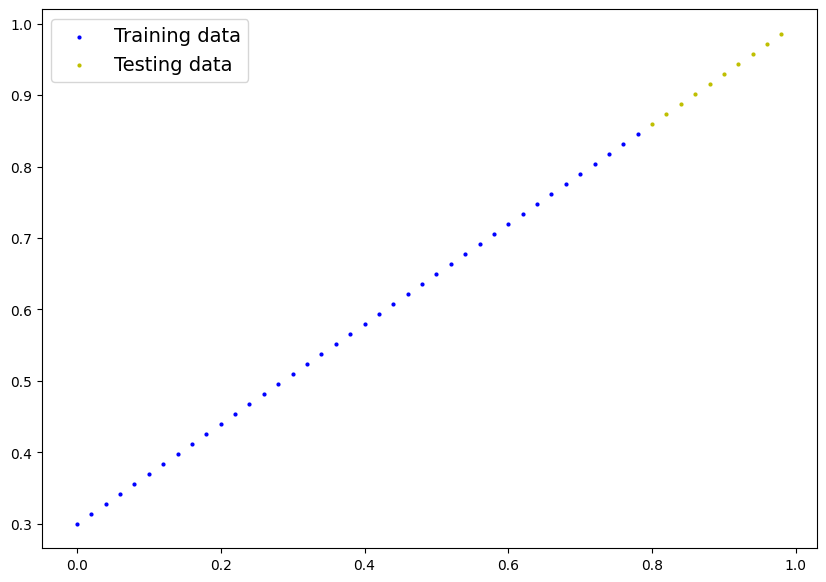

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions();

### Step-2: - Creating the Model

In [ ]:
# torch.nn -> 

In [ ]:
'''

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader.

For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).


torch.nn -> nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch
            Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

torch.nn.Parameter -> Stores tensors that can be used with nn.Module. 
                    If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, 
                    this is often referred to as "autograd".

torch.nn.Module-> The base class for all neural network modules, all the building blocks for neural networks are subclasses. 
                    If you're building a neural network in PyTorch, your models should subclass nn.Module. 
                    Requires a forward() method be implemented.
                    
torch.optim-> Contains various optimization algorithms 
            (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
            
def forward()-> All nn.Module subclasses require a forward() method, 
                this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).              

'''

In [ ]:
'''
If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from torch.nn,

1. nn.Module contains the larger building blocks (layers)
2. nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
3. forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
4. torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data



'''

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [8]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making simple prediction -> Using Random weights and bias

In [11]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)
    
# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

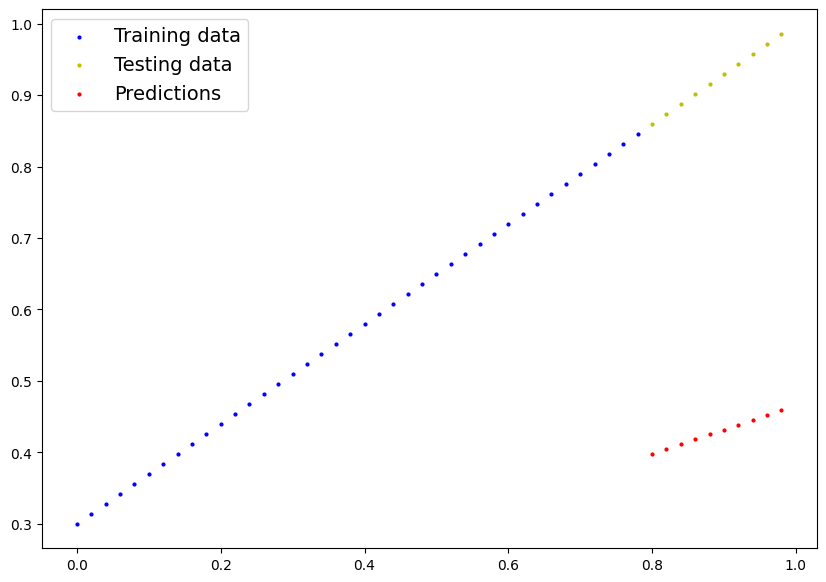

In [14]:
plot_predictions(predictions=y_preds)
y_test - y_preds

### Step-3 :- Training the Model

In [17]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [15]:
'''For the training loop, we'll build the following steps:

Number	Step name	What does it do?	Code example
1	Forward pass	The model goes through all of the training data once, performing its forward() function calculations.	model(x_train)
2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_train)
3	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	optimizer.zero_grad()
4	Perform backpropagation on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	loss.backward()
5	Update the optimizer (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.'''

'For the training loop, we\'ll build the following steps:\n\nNumber\tStep name\tWhat does it do?\tCode example\n1\tForward pass\tThe model goes through all of the training data once, performing its forward() function calculations.\tmodel(x_train)\n2\tCalculate the loss\tThe model\'s outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.\tloss = loss_fn(y_pred, y_train)\n3\tZero gradients\tThe optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.\toptimizer.zero_grad()\n4\tPerform backpropagation on the loss\tComputes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".\tloss.backward()\n5\tUpdate the optimizer (gradient descent)\tUpdate the parameters with requires_grad=True with respect to the loss gradients in order to improve them.'

In [20]:
'''As for the testing loop (evaluating our model), the typical steps include:

Number	Step name	What does it do?	Code example
1	Forward pass	The model goes through all of the testing data once, performing its forward() function calculations.	model(x_test)
2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_test)
3	Calulate evaluation metrics (optional)	Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.	Custom functions'''

"As for the testing loop (evaluating our model), the typical steps include:\n\nNumber\tStep name\tWhat does it do?\tCode example\n1\tForward pass\tThe model goes through all of the testing data once, performing its forward() function calculations.\tmodel(x_test)\n2\tCalculate the loss\tThe model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.\tloss = loss_fn(y_pred, y_test)\n3\tCalulate evaluation metrics (optional)\tAlongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.\tCustom functions"

In [18]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

In [19]:
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


/home/vchopra/anaconda3/envs/learning_env/lib/python3.11/site-packages/torch/autograd/graph.py:825: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


"As for the testing loop (evaluating our model), the typical steps include:\n\nNumber\tStep name\tWhat does it do?\tCode example\n1\tForward pass\tThe model goes through all of the testing data once, performing its forward() function calculations.\tmodel(x_test)\n2\tCalculate the loss\tThe model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.\tloss = loss_fn(y_pred, y_test)\n3\tCalulate evaluation metrics (optional)\tAlongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.\tCustom functions"

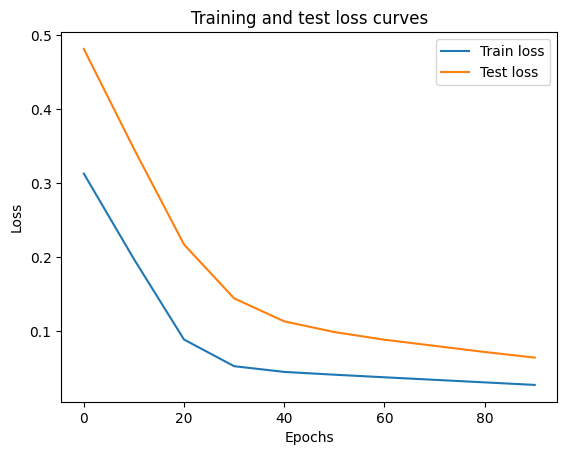

In [21]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### Step-4: - Making Predictions

In [23]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

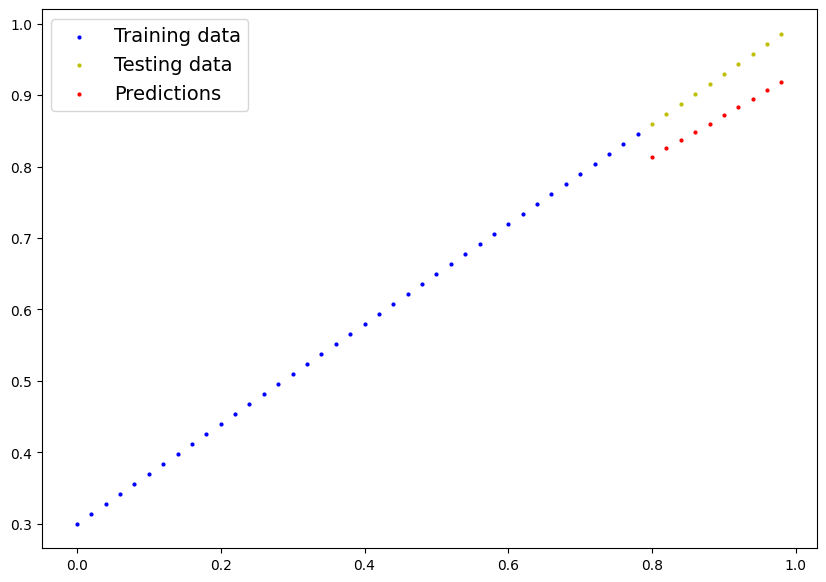

In [24]:
plot_predictions(predictions=y_preds)

### Step-5: - Saving and Loading the Model

In [25]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [26]:
# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
'''

Since we've now got a saved model state_dict() at models/01_pytorch_workflow_model_0.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

Why call torch.load() inside torch.nn.Module.load_state_dict()?

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

'''

In [27]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rwxrwxrwx 1 vchopra vchopra 1680 Jan  2 04:08 models/01_pytorch_workflow_model_0.pth


In [28]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipykernel_123331/1296048670.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [32]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [33]:
torch.cuda.is_available()

False

In [29]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [30]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device